# Data Science Foundations:  FoodHub Data Analysis
Shreeya Chalasani

### Context
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description
The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary
* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt 
from matplotlib import colormaps 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

 Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')

In [4]:
# creating a copy of the dataset 
df = df.copy()
# returns the first five rows 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer. 

In [5]:
df.shape

(1898, 9)

#### Observations:
The dataset has 1898 rows and 9 columns. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
The dataset has no null values in all columns 
The variable types integer, object and float datatypes are used and are appropriate for their variables. In this output, it is evident that restaurant name, cuisine type, rating, and day of the week are categorical variables. In further analysis, we will convert the 'rating' variable to a float to perform exploratory data analytics. 

In [256]:
df.isnull().sum()#There are no missing values in the dataset 

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: 
There are no missing values in this dataframe. 

In [257]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

There are 1,898 observations and 25% of orders cost 12.08 or less and take 23 minutes or less to prepare, 50% cost below 14.14 and take 27 minutes to prepare, and 75% cost below 22.29 and take 31 minutes to prepare. 

The minimum order cost is 4.47 and the maximum order cost is 35.41. The mean order cost is 16.49, and the mean preparation time is 27.37. 

In [8]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

Converting the data type rating to a numerical attribute.

In [11]:
df['rating'] = df['rating'].replace(["Not given"],0) 
df = df.astype({"rating": float, "order_id": object, "customer_id": object}) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


#### Observations:
There are 736 orders that do not have ratings.

# Exploratory Data Analysis (EDA)

## Univariate Analysis

In [12]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0.0,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0.0,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


### Observations on variable distributions (histograms, boxplots, countplots)

In [13]:
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

#### Observations:
Displays that the order id is a unique variable, not repeated elsewhere in the dataframe.

<Axes: xlabel='cuisine_type', ylabel='count'>

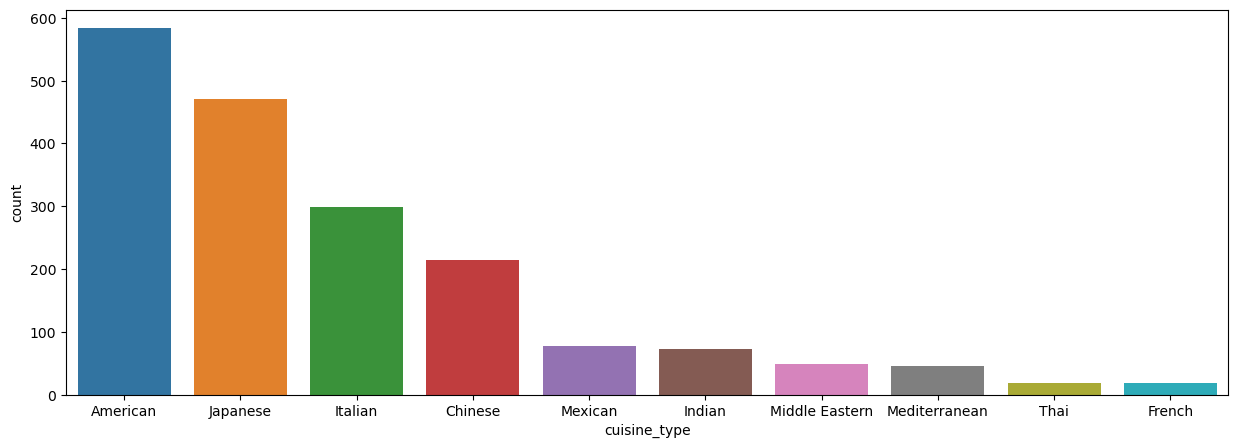

In [14]:
plt.figure(figsize = (15,5)) 
sns.countplot(data = df, x = 'cuisine_type', order=df['cuisine_type'].value_counts().iloc[:10].index)

#### Observations:
Displays that American cuisine type is the highest ordered cuisine type. The graph displays the top ten cuisine types. 

<Axes: xlabel='restaurant_name', ylabel='count'>

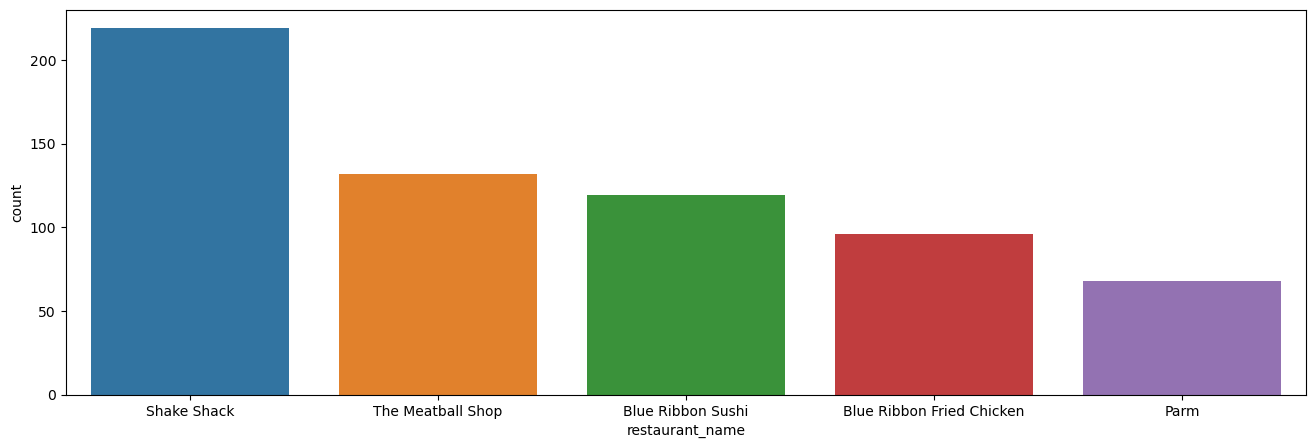

In [15]:
plt.figure(figsize = (16,5)) 
sns.countplot(data = df, x = 'restaurant_name', order=df['restaurant_name'].value_counts().iloc[:5].index)

#### Observations:
Displays that Shake Shack is the most ordered restauarant in the dataframe. This graph displays the top five restaurants.

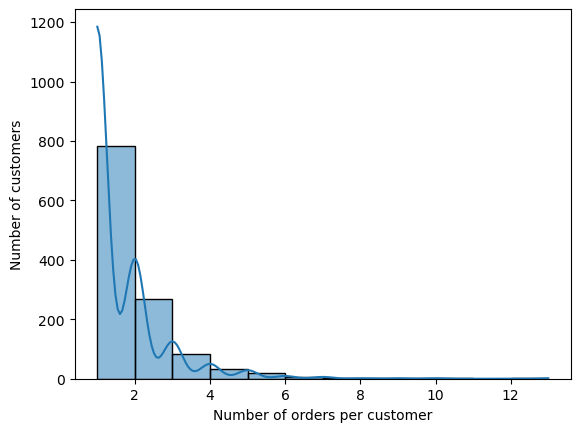

In [16]:
ax = sns.histplot(df.customer_id.value_counts(), binwidth=1, binrange=(1,13), kde=True)
ax.set(xlabel="Number of orders per customer")
ax.set(ylabel="Number of customers") 
plt.show()
## the majority of customer have only placed 1 order, we can investigate this further to identify customer patterns 

In [51]:
customer_counts = df['customer_id'].value_counts()
low_order_count = customer_counts[(customer_counts == 1) | (customer_counts ==2)]
total_customers = len(low_order_count) 

print("The number of customers with 1 or 2 orders is", total_customers)

The number of customers with 1 or 2 orders is 1051


#### Observations: 
The majority of customers have only placed 1 order. The data is right skewed, indicating the majority of users (87.5%) have placed less than 2 orders. The mean is greater than the median. 


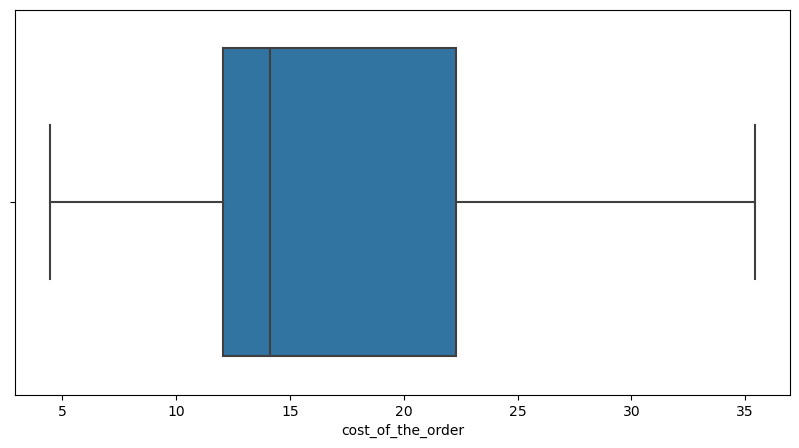

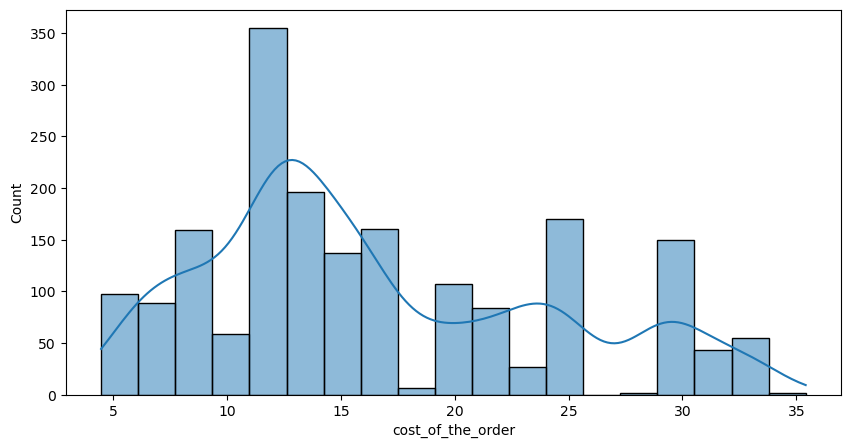

In [52]:
plt.figure(figsize = (10,5)) 
sns.boxplot(data = df, x= "cost_of_the_order") 
plt.show()
plt.figure(figsize = (10,5)) 
sns.histplot(data = df, x = "cost_of_the_order", kde = True)
plt.show()

#### Observations:
These graphs display distribution of the cost of orders in the dataset. The number of orders per customer varies greatly, with the most number of customers ordering 1-3 times orders on the platform.  The average cost of orders placed is less than 15 dollars. 

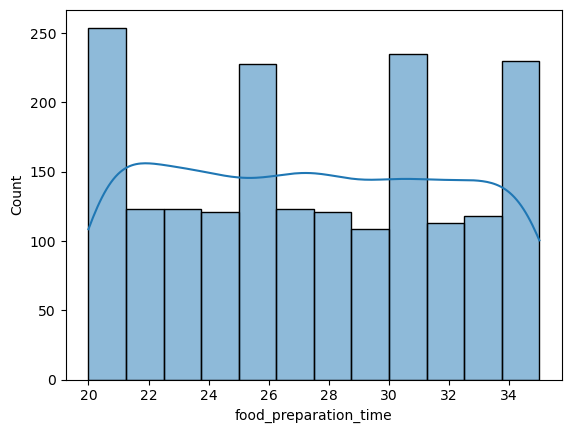

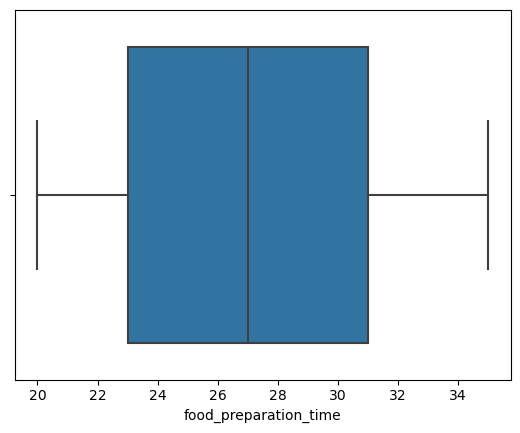

In [29]:
##plotting histograms and boxplots for the food preparation time
## Observations- the mean food perparation time among restaurants is around 27 minutes 
sns.histplot(data= df, x = 'food_preparation_time', kde = True)
plt.show()
sns.boxplot(data = df, x = 'food_preparation_time')
plt.show()

#### Observations:
These graphs display distribution of the food preparation time, displaying that the mean food preparation time is about 27 minutes. The histogram displays that many orders take over 20, 26, 30, or 34 minutes to prepare.

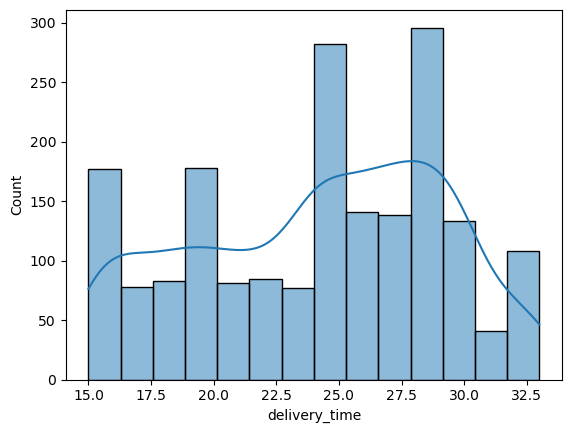

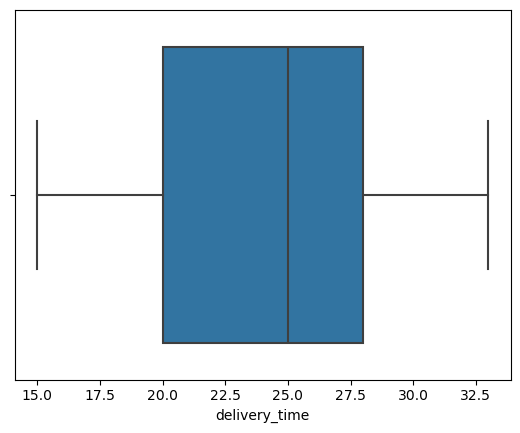

In [30]:
##plotting histograms and boxplots for the food preparation time
## Observations- the mean food perparation time among restaurants is around 27 minutes 
sns.histplot(data= df, x = 'delivery_time', kde = True)
plt.show()
sns.boxplot(data = df, x = 'delivery_time')
plt.show()

#### Observations:
These graphs display distribution of the delivery time for orders. The mean delivery time is 25.0 minutes.

<Axes: xlabel='day_of_the_week', ylabel='count'>

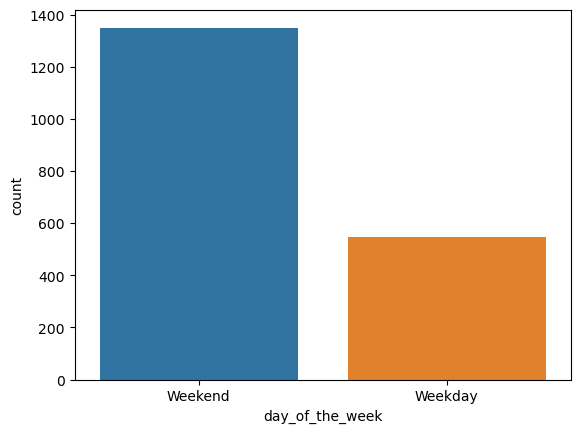

In [32]:
## plotting a countplot to display how many orders are placed on the weekend vs. a weekday 
sns.countplot(data = df, x='day_of_the_week')

#### Observations:
This countplot displays the count of orders based on the day of the week variable. There are more orders placed on the Weekend than on the Weekdays. 

<Axes: xlabel='rating', ylabel='count'>

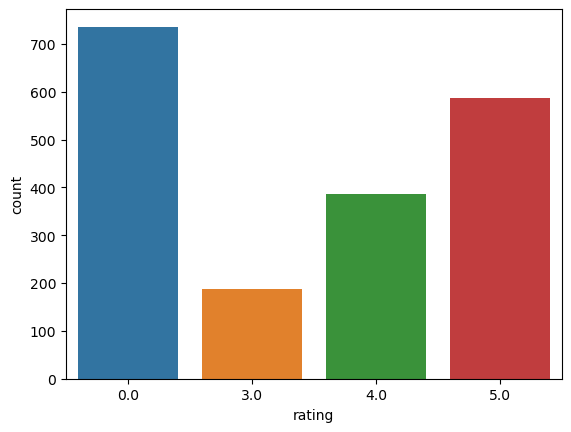

In [33]:
sns.countplot(data = df, x='rating')

#### Observations:
This countplot displays the count of orders based on the rating received. The majority of ratings received not given (0.0). 

### Finding the top performing restaurants 

In [25]:
df['restaurant_name'].value_counts().head()
# observations - shake shack has the heighest amount of orders, succeeding 2000 

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
The top five restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. Shake Shack has the highest number of orders, receiving 219 orders. 


### Finding the most popular cuisine on weekends

In [53]:
weekend_orders = df[df["day_of_the_week"].isin(["Weekend"])]
count_cuisine = weekend_orders["cuisine_type"].value_counts()
print(count_cuisine)

##Filtering by day of the week (weekend), we can find that American cuisine has the highest count

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64


#### Observations: 
The most popular cuisine on the weekends is American cuisine, receiving 415 orders on the weekends. 

### Percentage of the orders cost more than 20 dollars

In [54]:
high_cost = df[df["cost_of_the_order"] > 20]
high_cost
##there are 555 orders that cost more than $20 
percentage = (len(high_cost)/ len(df)) * 100 
print("Percentage of orders that cost more than 20 dollars is: {:.2f}%".format(percentage))

Percentage of orders that cost more than 20 dollars is: 29.24%


#### Observations:
The percentage of orders that cost more than 20 dollars is 29.24%. 

### Mean order delivery time

In [55]:
mean_delivery_time = df["delivery_time"].mean()
mean_delivery_time = mean_delivery_time.round(2)
print(mean_delivery_time)
print("The mean delivery time is:", mean_delivery_time, "minutes") 

24.16
The mean delivery time is: 24.16 minutes


#### Observations:
The mean order delivery time is about 24.16 minutes. 

### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed:

#### Observations:


In [36]:
df['customer_id'].value_counts().nlargest(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations: 
The top 3 most frequent customers have placed 9 or more orders. 

# Multivariate Analysis

### Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

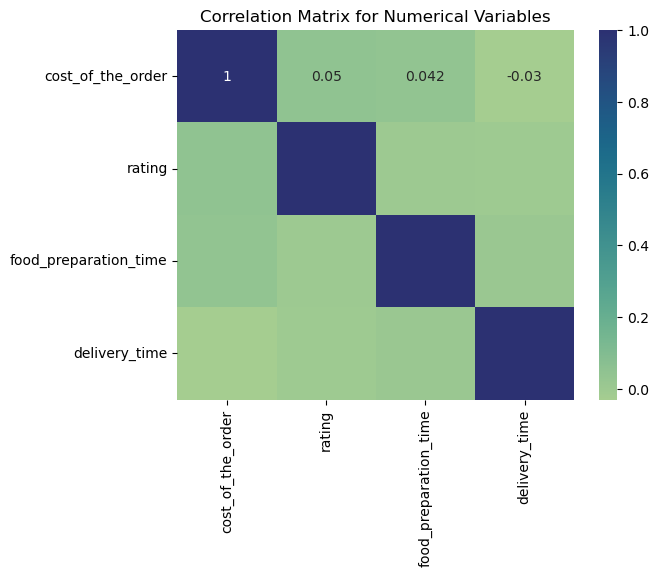

<Figure size 1000x500 with 0 Axes>

In [56]:
## Correlation Plots- 
##Numerical variables include: cost of order, rating, food preparation time, delivery time
num_variables = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time'] 
num_subset = df[num_variables] 
sns.heatmap(num_subset.corr(), annot=True, cmap='crest') 
plt.title("Correlation Matrix for Numerical Variables") 
plt.figure(figsize=(10,5))
plt.show()

#### Observations: 
The variables rating and food preparation time are correlated with the cost of order. 

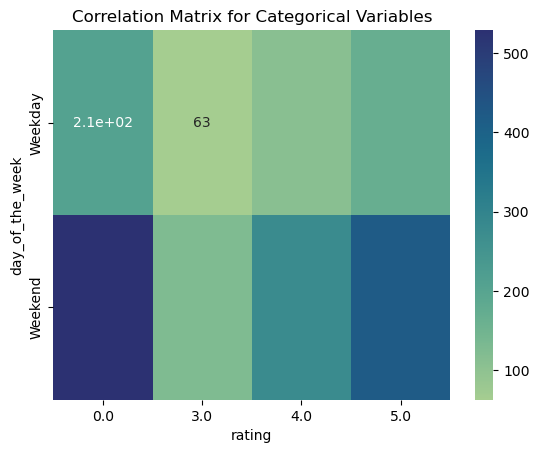

<Figure size 1000x500 with 0 Axes>

In [57]:
cat_table = pd.crosstab(df['day_of_the_week'], df['rating'])
sns.heatmap(cat_table, annot= True, cmap='crest')
plt.title("Correlation Matrix for Categorical Variables") 
plt.figure(figsize=(10,5)) 
plt.show()

#### Observations: 
Ratings are correlated with the day of the week- we have more ratings in the weekend than on weekdays. 

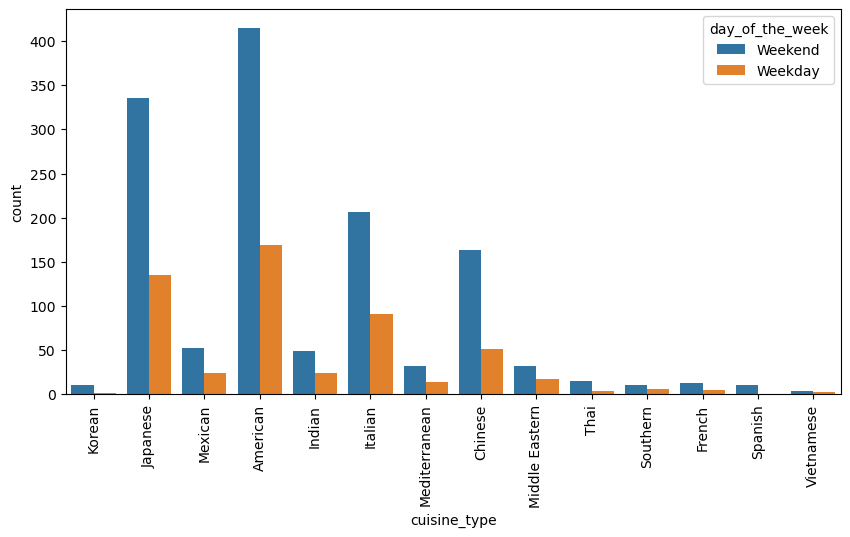

In [277]:
#Categorical values: rating, day of the week, cusine type, and restaurant name 
plt.figure(figsize = (10,5)) 
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week') 
plt.xticks(rotation=90)
plt.show()

#### Observations: 
This graph displays the highest ordered cuisine type based on the day of the week. American food is the most ordered cuisine on the weekends. 

In [296]:
## calculate the sum of order costs of the order for each cuisine type 
sum_order_costs = df.groupby('cuisine_type')['cost_of_the_order'].mean().reset_index()
sum_order_costs = df.sort_values(by='cost_of_the_order', axis = 0, ascending= False)
sum_order_costs.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4.0,21,29,50
1646,1477665,231061,Han Dynasty,Chinese,34.19,Weekday,0.0,21,31,52
1762,1477700,60039,Blue Ribbon Sushi,Japanese,33.37,Weekday,3.0,30,27,57
1831,1476970,275689,Nobu Next Door,Japanese,33.37,Weekend,4.0,32,21,53
1370,1478329,116992,Tres Carnes,Mexican,33.32,Weekday,4.0,21,33,54


<Axes: xlabel='cuisine_type', ylabel='cost_of_the_order'>

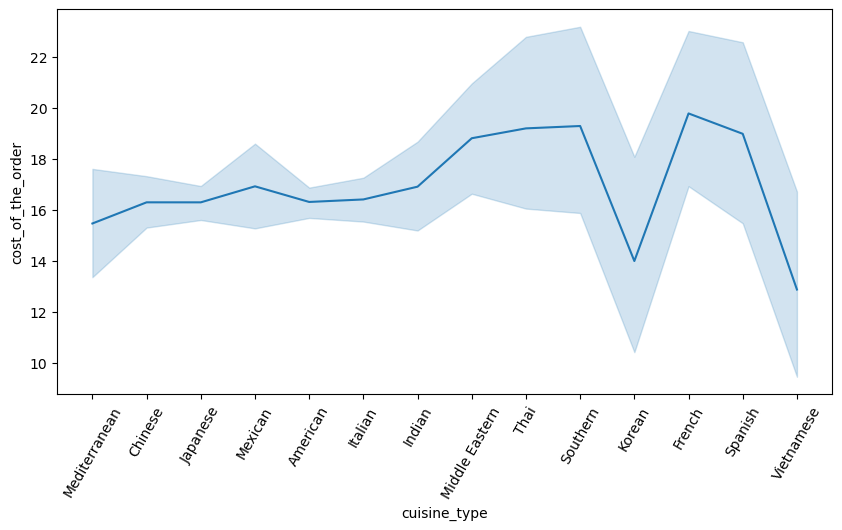

In [297]:
## cuisine vs the average cost of order 
plt.figure(figsize=(10,5)) 
plt.xticks(rotation=60) 
sns.lineplot(data=sum_order_costs, x="cuisine_type", y="cost_of_the_order")

In [280]:
## calculates the total count of orders for each cuisine type 
order_count_by_cuisine = df.groupby('cuisine_type')['order_id'].count().reset_index()
order_count_by_cuisine.sort_values(by='order_id', ascending=False, inplace= True)
order_count_by_cuisine.head()

,cuisine_type,order_id
0,American,584
5,Japanese,470
4,Italian,298
1,Chinese,215
8,Mexican,77


<Axes: xlabel='cuisine_type', ylabel='cost_of_the_order'>

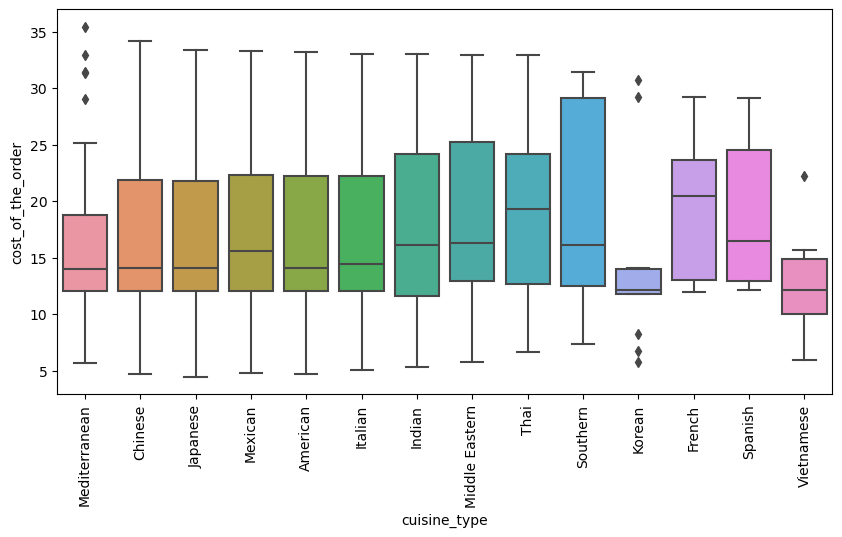

In [281]:
## plots the average of order costs by the cuisine type 
plt.figure(figsize = (10,5)) 
plt.xticks(rotation=90)
sns.boxplot(data=sum_order_costs, x='cuisine_type', y='cost_of_the_order') 

#### Observations: 
These graphs displays the cuisine type versus the average cost of the order. Although American cuisine is most frequently ordered, the average price is less than 15 dollars. The boxplot displays that french or thai food have higher average cost of orders, indicating that more money is spent in these restaurants. 

In [282]:
## cuisine types grouped by ratings 
cuisine_by_rating = df.groupby('cuisine_type')['rating'].count().reset_index()
cuisine_by_rating = df.sort_values(by='rating', axis=0, ascending=False) 
cuisine_by_rating.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
949,1478429,355090,Shake Shack,American,22.85,Weekend,5.0,24,23
418,1477271,94152,The Meatball Shop,Italian,17.08,Weekday,5.0,22,26
720,1477365,61181,Shake Shack,American,14.07,Weekend,5.0,33,25
721,1477266,85422,Saravanaa Bhavan,Indian,24.25,Weekday,5.0,29,26
723,1478428,53543,The Smile,American,12.18,Weekday,5.0,29,27


<Axes: xlabel='rating', ylabel='food_preparation_time'>

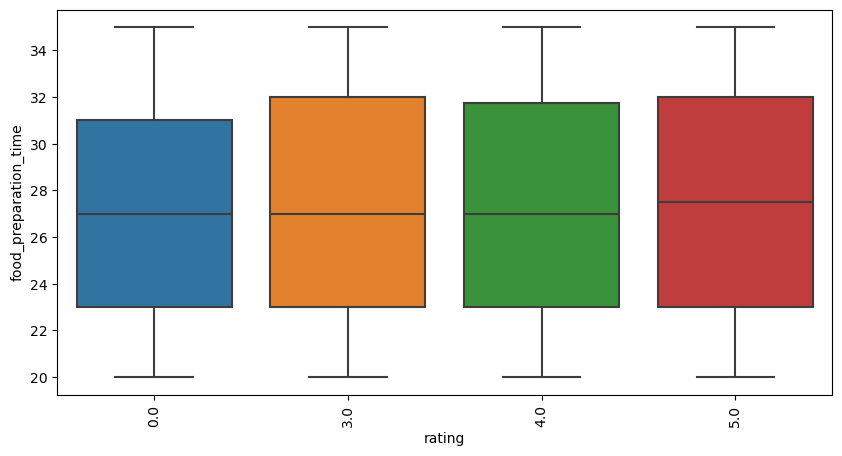

In [299]:
## graph displays ratings by average food preparation time 
plt.figure(figsize = (10,5)) 
plt.xticks(rotation=90)
sns.boxplot(data=cuisine_by_rating, x='rating', y='food_preparation_time') 

#### Observations: 
This boxplot displays the rating vs. food preparation time. On average, the food preparation time is similar for restaurants that receive ratings 0-4.

In [284]:
## cuisine types by average food preparation time 
cuisine_by_mean_preptime = df.groupby("cuisine_type")['food_preparation_time'].mean().reset_index()
cuisine_by_mean_preptime = df.sort_values(by='food_preparation_time', axis=0, ascending=False) 
cuisine_by_mean_preptime.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
600,1478357,142356,Blue Ribbon Sushi,Japanese,14.07,Weekday,0.0,35,29
1016,1476961,112272,Blue Ribbon Sushi,Japanese,14.02,Weekday,0.0,35,29
529,1478112,232542,The Meatball Shop,Italian,22.36,Weekend,4.0,35,21
1798,1476853,139626,L'Express,French,16.98,Weekday,0.0,35,29
1310,1477358,83287,Boqueria,Spanish,14.50,Weekend,0.0,35,29


<Axes: xlabel='cuisine_type', ylabel='food_preparation_time'>

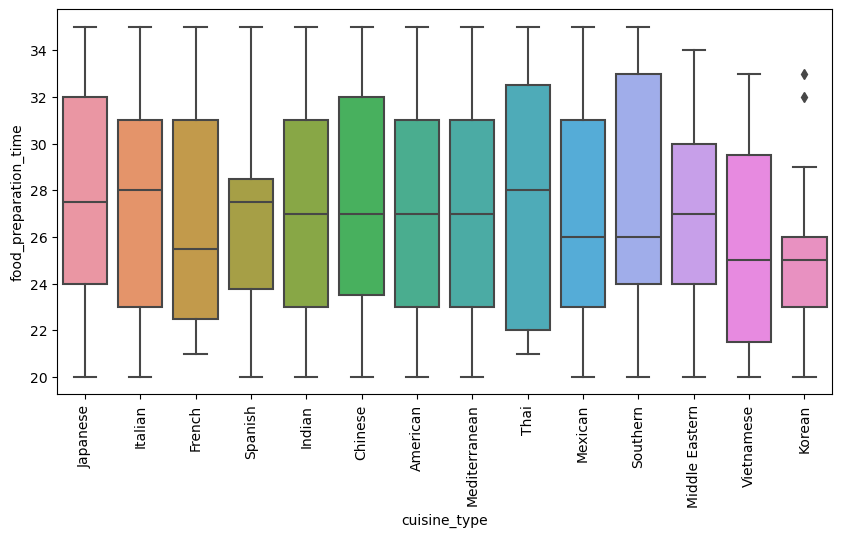

In [300]:
## graph displays cuisine types by average food preparation time 
plt.figure(figsize = (10,5)) 
plt.xticks(rotation=90)
sns.boxplot(data=cuisine_by_mean_preptime, x='cuisine_type', y='food_preparation_time') 

#### Observations: 
This boxplot displays the cuisine type vs. food preparation time. We can see that Thai food has the highest mean food preparation time, whereas French and Vietnamese food have lower preparation times. 

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [303]:
## groups the existing dataframe by restaurant name if the rating is not equal to zero, with a mean greater than 4 
df2 = df[['restaurant_name', 'rating']][df['rating'] != 0].groupby('restaurant_name').mean()>4 
df2.reset_index(inplace = True) 
df3 = df[['restaurant_name', 'rating']][df['rating']!= 0].groupby('restaurant_name').count()>50 
df3.reset_index(inplace=True) 
promo_restaurants = pd.merge(df3[df3['rating']==True], df2[df2['rating']== True], on= 'restaurant_name')
promo_restaurants

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


#### Observations:
The restaurants Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Shake Shack and The Meatball Shop qualfy for the promotional offer as they received more than 50 orders and their average rating is greater than 4. 

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [286]:
## 25% on orders > 20 
## 15% on orders > 5 
## find the net revenue generated by the company across all orders


revenue = 0 
income = 0
cost_of_the_order = pd.Series(df['cost_of_the_order'])


for i in range(len(cost_of_the_order)): 
    if (cost_of_the_order[i]> 5) & (cost_of_the_order[i]<20): 
        income = cost_of_the_order[i]*0.15
    elif (cost_of_the_order[i]>20): 
        income = cost_of_the_order[i]*0.25 
    else: 
        income = 0
    revenue = revenue+income

print("The net revenue generated by the company is: $",round(revenue,2))

The net revenue generated by the company is: $ 6166.3


#### Observations:
The net revenue generated by the comapny is $6,166.30. 

### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [302]:
#adds a column to the dataframe indicating the total time as the sum of delivery and food prep. time
df['total_time'] = df['food_preparation_time']+df['delivery_time']
df.head()
total_obs = df['total_time'].count()
total_obs
time_above60 = df['total_time'][df['total_time'] > 60].count()
time_above60
percentage_above_60 = round((time_above60/total_obs)*100,2)
percentage_above_60
print(percentage_above_60, '% of orders take more than 60 minutes to be prepared and delivered')

10.54 % of orders take more than 60 minutes to be prepared and delivered


#### Observations:
By filtering the dataset, we can see that 10.54% of orders take greater than one hour to prepare and deliver. 

### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

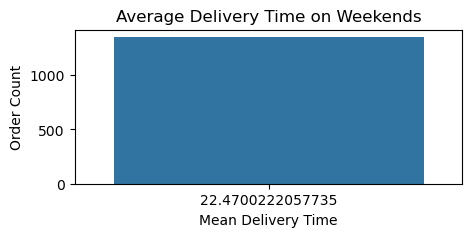

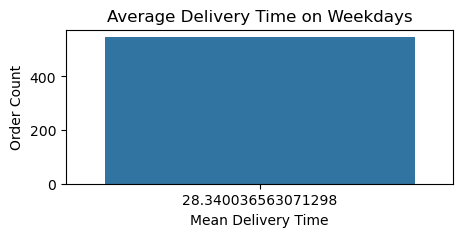

In [298]:
df_weekday = df[df['day_of_the_week'].isin(['Weekday'])]
df_weekday.head()
df_weekend = df[df['day_of_the_week'].isin(['Weekend'])]
df_weekend.head()
df_weekday['mean_delivery_time']= df_weekday['delivery_time'].mean()
df_weekend['mean_delivery_time']= df_weekend['delivery_time'].mean()
plt.figure(figsize=(5, 2))
sns.countplot(data=df_weekend, x="mean_delivery_time")
plt.xlabel('Mean Delivery Time')
plt.ylabel("Order Count") 
plt.title("Average Delivery Time on Weekends") 
plt.show()
plt.figure(figsize=(5, 2))
sns.countplot(data=df_weekday, x="mean_delivery_time")
plt.xlabel('Mean Delivery Time')
plt.ylabel("Order Count") 
plt.title("Average Delivery Time on Weekdays") 
plt.show()

#### Observations:
The average delivery time on weekends is about 22.47 minutes, while the average delivery time on weekdays is about 28.34 minutes. 

# What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? 

### Conclusions:
*  The majority of customers place one order
*  The majority of FoodHub orders were placed during the weekend
*  The most popular cuisine is American cuisine, and the most popular restaurant is shake shack
*  The majority of orders received a rating of "Not Given"
*  Only about 10% of orders take greater than 1 hour to prepare and deliver

### Recommendations:

*  To understand customer experience, offer incentives for completing ratings to customers after an order has been placed.
*  Marketing can be utilized to increase orders of popular cuisine types on weekdays.
*  Periodic reviews of the average delivery time on weekdays- what causes longer weekday preparation and delivery times? 

---